In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import  train_test_split

In [ ]:
#Read Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ASL/Our_Dataset.csv')

In [ ]:
#Covert data to nd numpy array
df_numpy = np.asarray(df,dtype='float32')

#Split to X,y
X = df_numpy[:,1:]
y = df_numpy[:,0]

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=13)

#Normaliztion for X
X_train =  X_train/255.0
X_test = X_test/255.0

#One-Hot-Encoding for y
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

#Reshape input
n=256
X_train = X_train.reshape(X_train.shape[0],n,n,1)
X_test = X_test.reshape(X_test.shape[0],n,n,1)

(324, 256, 256, 1)

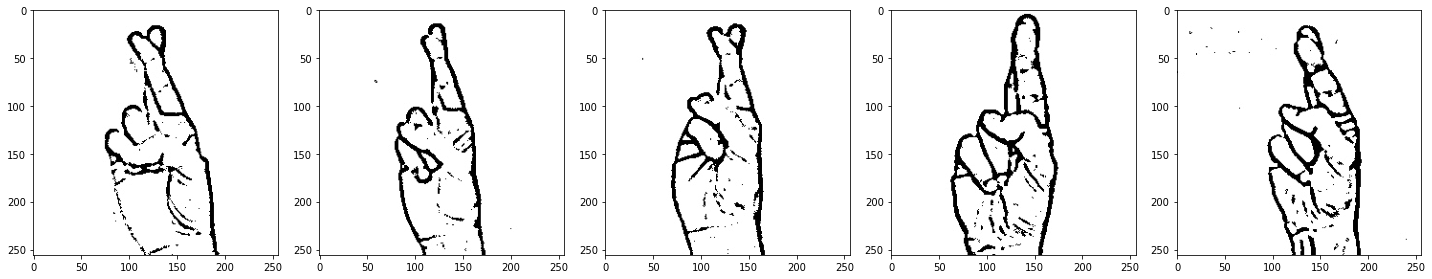

In [ ]:
f, ax = plt.subplots(1,5) 
f.set_size_inches(20, 20)
# k = 0
c = 0
index = 17
while c != 5 :
  k = random.randint(1,X_train.shape[0]-1)
  if int(y_train[k]) == index:
    ax[c].imshow(X_train[k].reshape(n, n) , cmap = "gray")
    c += 1
    # ax[i,j].set_title("Class : "+class_names[int(y_train[k])])
    plt.tight_layout()

In [ ]:
# del model
# del history

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

n = 256

#Model

model = Sequential()

model.add(Conv2D(32, (11, 11), input_shape = (n,n,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (8, 8)))

model.add(Conv2D(16, (9, 9), activation='relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))

model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 246, 246, 32)      3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 16)        41488     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience = 7, verbose=1,factor=0.95, min_lr=0.00001)
history = model.fit(X_train,y_train_cat, batch_size = 324 ,epochs = 100 , verbose = 1, validation_data = (X_test, y_test_cat) , callbacks = [learning_rate_reduction])

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 3.2387 - acc: 0.0370 - val_loss: 3.2876 - val_acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 335ms/step - loss: 3.2337 - acc: 0.0586 - val_loss: 3.2236 - val_acc: 0.0278
Epoch 3/100
1/1 [==============================] - 0s 328ms/step - loss: 3.2146 - acc: 0.0432 - val_loss: 3.2206 - val_acc: 0.0833
Epoch 4/100
1/1 [==============================] - 0s 334ms/step - loss: 3.2155 - acc: 0.0648 - val_loss: 3.2237 - val_acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 329ms/step - loss: 3.2132 - acc: 0.0617 - val_loss: 3.2343 - val_acc: 0.0278
Epoch 6/100
1/1 [==============================] - 0s 339ms/step - loss: 3.2110 - acc: 0.0370 - val_loss: 3.2373 - val_acc: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 323ms/step - loss: 3.1980 - acc: 0.0586 - val_loss: 3.2536 - val_acc: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 363ms/step - los

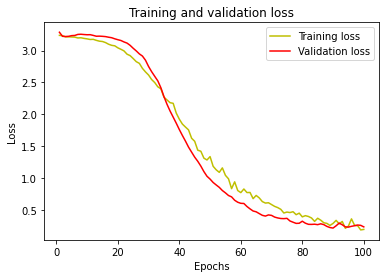

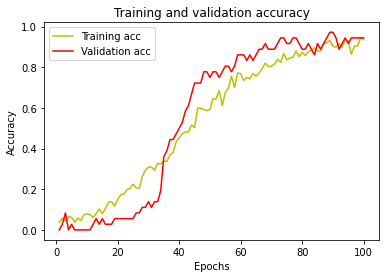

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
=plt.show()

In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/ASL/final_model/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/ASL/final_model/assets
